![logo](https://eventos.galileo.edu/images/logo-noslogan.png)

### Postgrado en Analisis y Prediccion de Datos

# *Curso*: Ciencia de Datos en Python

![title](imagenproyecto.png)

---

![title](paso1.png)

In [228]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn


---

![title](paso2.png)

In [161]:
# Carga de datos usando la función "Load" the NumPy

setOriginal = np.load('proyecto_training_data.npy')

In [162]:
setOriginal

array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
        6.50000e+01],
       [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
        8.00000e+01],
       [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
        6.80000e+01],
       ...,
       [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
        6.60000e+01],
       [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
        6.80000e+01],
       [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
        7.50000e+01]])

In [163]:
# Dimension

setOriginal.ndim

2

In [164]:
# Shape del DataSet

setOriginal.shape

(1460, 6)

In [165]:
# Length del array

lentotal = len(setOriginal)

lentotal

1460

In [166]:
# Slicing Set Original en 80% Entrenamiento y 20% Validacion

entrenamiento, validacion = np.split(setOriginal,[int(len(setOriginal)*0.8)])

print(f'La longitud del set de entrenamiento es de: {len(entrenamiento)} equivalente al {(len(entrenamiento)/lentotal)*100}%\n')

print(f'La longitud del set de validacion es de: {len(validacion)} equivalente al {(len(validacion)/lentotal)*100}%')

La longitud del set de entrenamiento es de: 1168 equivalente al 80.0%

La longitud del set de validacion es de: 292 equivalente al 20.0%


---

![title](paso3.png)

### Información sobre el set de datos

El dataset contiene una variable dependiente y cinco variables independientes.

- Y = El valor de la propiedad en venta en $

- X1 = Calidad en general de la vivienda


|Nota|Descripción|
|---|--------|
|10|Very Excellent|
|9|	Excellent|
|8|	Very Good|
|7|	Good|
|6|	Above Average|
|5|	Average|
|4|	Below Average|
|3|	Fair|
|2|	Poor|
|1|	Very Poor|

- X2 = 1stFlrSF, pies cuadrados primer nivel

- X3 = TotRmsAbvGrd, total de cuartos

- X4 = YearBuilt: Fecha de construcción original

- X5 = LotFrontage, pies lineales de calle



In [229]:
# Para cada variable en el dataset calcular (media, valor máximo, valor mínimo, rango desviación estándar)

### Para el análisis exploratorio se utilizará Pandas.

In [231]:
df = pd.DataFrame(entrenamiento, columns=['Y','X1','X2','X3','X4','X5'])
df.head()
media = df.mean(axis=0)
media

Y     180590.277397
X1         6.101027
X2      1156.323630
X3         6.485445
X4      1971.451199
X5        69.946985
dtype: float64

In [232]:
# Verificando si el set de datos contiene NaN

print(f'El set de datos contiene valores NaN: {df.isnull().values.any()}')

El set de datos contiene valores NaN: True


In [233]:
# Eliminando las filas que contengan NaN

df = df.dropna()
df.head()


,Y,X1,X2,X3,X4,X5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


### Generación de resumen de estadísticos para cada variable por medio de una función

In [180]:
def estadisticos(x):

    for column in df:

        print(f'Estadisticos de: {column}\n')
        print(f'La media es: {round(df[column].mean(),4)}')
        print(f'El valor maximo es: {df[column].max()}')
        print(f'El valor minimo es: {df[column].min()}')
        print(f'El rango es: {df[column].max()-df[column].min()}')
        print(f'La desviacion estandar es: {round(df[column].std(),4)}\n')
        print('---------------------------------------------------------')
    
estadisticos(df)
    

Estadisticos de: A

La media es: 180994.2464
El valor maximo es: 755000.0
El valor minimo es: 34900.0
El rango es: 720100.0
La desviacion estandar es: 83331.2669

---------------------------------------------------------
Estadisticos de: B

La media es: 6.1247
El valor maximo es: 10.0
El valor minimo es: 1.0
El rango es: 9.0
La desviacion estandar es: 1.4183

---------------------------------------------------------
Estadisticos de: C

La media es: 1155.6289
El valor maximo es: 3138.0
El valor minimo es: 334.0
El rango es: 2804.0
La desviacion estandar es: 372.5885

---------------------------------------------------------
Estadisticos de: D

La media es: 6.499
El valor maximo es: 14.0
El valor minimo es: 2.0
El rango es: 12.0
La desviacion estandar es: 1.6182

---------------------------------------------------------
Estadisticos de: E

La media es: 1970.6663
El valor maximo es: 2010.0
El valor minimo es: 1875.0
El rango es: 135.0
La desviacion estandar es: 31.543

-------------------

---

![title](paso4.png)

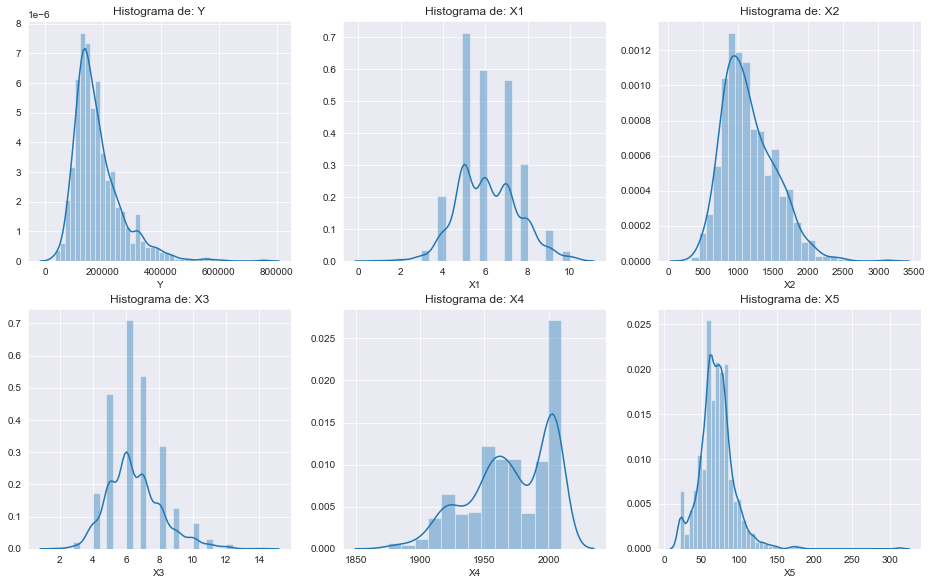

In [234]:

a, b, c = 3, 3, 1

fig = plt.figure(figsize=(16,15))

sns.set_style("darkgrid")

for i in df:
    plt.subplot(a,b,c)
    plt.title(f'Histograma de: {i}')
    sns.distplot(df[i])
    c = c+1

plt.show()

---

![title](paso5.png)

In [217]:
test = df['A']
test2 = df['B']

In [218]:
test.corr(test2)

0.8086589371846093

In [219]:
test2.corr(test)

0.8086589371846095

In [226]:
vardep = df['A']

for i in df.columns[1:]:
    varind = df[i]
    corre = vardep.corr(varind)
    print(corre)

0.8086589371846093
0.6401417047717455
0.5748658135586456
0.5483005074396333
0.363291616653892


---

![title](paso6.png)